
# Project: Investigate a Dataset (TMDb Dataset)

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='Introduction'></a>
## Introduction

1. Dataset used: The movies database (TMDb)
    It's a dataset that contains the movies produced in the last few decades and all the related info

2. First i clean load the dataset, clean it and make it ready for analysis
3. Then i ask some questions and conclude some answers based on the plotted graphs in the Exploration section

Main Research Questions:
1. Are we producing more films now than before?
2. Is the average rate of the movies increasing or decreasing over the years? which addresses either the quality of the movies or the taste and rating behavior of the audience
3. Do people give ratings more these days than the past years?
4. Does runtime affects either the Rating or the Popularity of movies?

In [71]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling


### Loading CSV file

In [72]:
# Loading CSV from my personal pc
df = pd.read_csv(r'/Users/ahmedzidane/Documents/Nanodegree/manipulating data/tmdb-movies.csv')
df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### General Properties

In [73]:
## Checking what columns has null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [74]:
## checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [75]:
## Checking if we have zero values in numerical columns like Revenue, vote_count, runtime and vote_average
## I only checked these columns because i am planning to use them


zeroes_count = []

def zerovalues (*args):
    for x in args:
        y = (x == 0).sum()
        zeroes_count.append(y)
    return zeroes_count
    
zerovalues(df['revenue'],df['vote_count'],df['vote_average'],df['runtime'],df['popularity'])


## Only revenue has a lot of zero value, runtime has few zero values that can be replaced by mean value later


[6016, 0, 0, 31, 0]

### Data Cleaning (Removing Duplicates, unnecessary columns, adjusting data types, filling zero values, outliers )

In [76]:
## Checking if there are any duplicates (Based on the ID column)
sum(df.duplicated(subset = 'id'))

## Removing few Duplicate 
df.drop_duplicates(subset ="id", 
                     keep = False, inplace = True)

In [77]:
## Removing unnecessary columns which won't be used in my analysis
df1 = df.drop(['homepage', 'overview', 'tagline' , 'keywords'],axis=1)

## changing the type of the release date column to date 
df1['release_date'] = pd.to_datetime(df['release_date'])



In [78]:
## filling out zero values in runtime with the mean value
df1.loc[df1['runtime'] == 0,'runtime'] = df1['runtime'].mean()



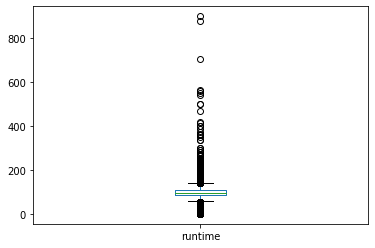

In [79]:
## Box plotting runtime to detect  outliers
df1['runtime'].plot(kind='box') 

## removing outlier values (more than 300 minutes)
df2 = df1.loc[df1['runtime'] < 250]



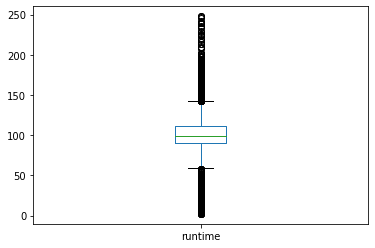

In [80]:
## viewing the new runtime boxplot after removing runtime outliers
df2['runtime'].plot(kind='box') 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Are we producing more and more movies each year?

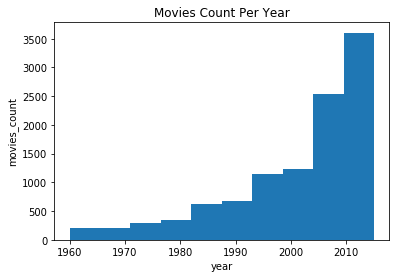

In [59]:
## Plotting the number of movies per year, as shown movies production increase with time

df1['release_year'].plot(kind='hist')
plt.xlabel('year')
plt.ylabel('movies_count')
plt.title('Movies Count Per Year')
plt.show()


### Research Question 2:  Is the average rate increasing or decreasing over the years?

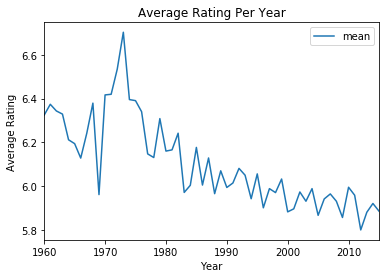

In [64]:
## Plotting the average rating per year
## Does movies rating get worse because movies quality gets worse or because the audience is more tough to please?

df_yearly_rating=df1.groupby('release_year').agg(['mean']).reset_index()
df_yearly_rating.plot(x='release_year', y='vote_average',kind="line")

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Per Year')
plt.show()

### Research Question 3:  Is the number of voters increasing or decreasing over the years?


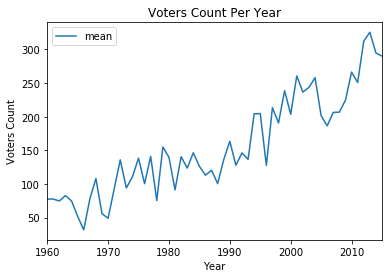

In [65]:
## Plotting the average number of voters per year
## Does engagement in voting increase or decrease by years? 
## this indicates that more people and engaged and concernced with movies these days

df_yearly_rating.plot(x='release_year', y='vote_count',kind="line")

plt.xlabel('Year')
plt.ylabel('Voters Count')
plt.title('Voters Count Per Year')
plt.show()

### Research Question 4:  is the average rating correlated with the runtime?


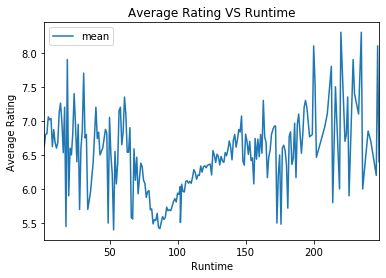

In [66]:
## Plotting average rating relation with runtime
## Does longer movies get better ratings? or vice versa

df_runtime=df2.groupby('runtime').agg(['mean']).reset_index()
df_runtime.plot(x='runtime' , y='vote_average' , kind='line')

plt.xlabel('Runtime')
plt.ylabel('Average Rating')
plt.title('Average Rating VS Runtime')
plt.show()

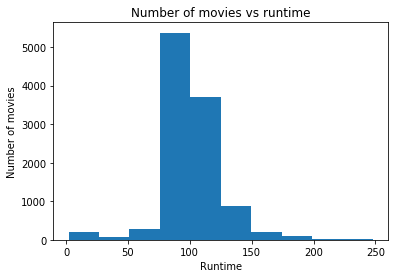

In [70]:
## Plotting runtime frequency for movies
## Most of the movies has a certain range of runtime, this explains the above chart.
df2['runtime'].plot(kind='hist')

plt.xlabel('Runtime')
plt.ylabel('Number of movies')
plt.title('Number of movies vs runtime')
plt.show()

### Research Question 5:  is the popularity of the movie correlated with the runtime?


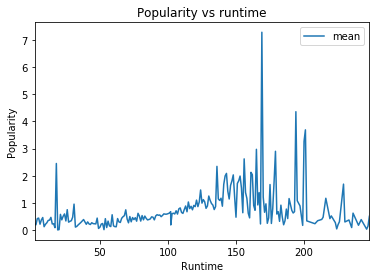

In [69]:
## Movies with a certain range of runtime can have higher popularity than other movies

df_runtime.plot(x='runtime' , y='popularity' , kind='line')

plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.title('Popularity vs runtime')
plt.show()

<a id='conclusions'></a>
## Conclusions

1. We produce more movies now than in the past years, and the trend seems to be increasing
2. Although the number of voters increase over the years, the average vote is decreasing, which means that people are less satisfied newer movies than older ones
3. There's no clear correlation between the runtime of a movie and the average rating, movies of runtime between 70 and 120 have lower ratings on average but also most of the movies have runtime between 70 and 120 which might affect the average.
4. Movies with runtime between 150 and 200 are more popular than other movies.

### Limitations:
There might be other factors that also plays a role in a movie's popularity & average rating than the runtime, but it was nice to see if there's a correlation between them.
